In [875]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [876]:
#Importing house price data into data frame
housing_data = pd.read_csv("train.csv")

In [877]:
#Inspecting data frame
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [878]:
#Data Exploration
#all numeric (float and int) variables in the dataset
housing_data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
housing_data_numeric.drop('SalePrice',axis=1,inplace=True)
housing_data_numeric.head()
housing_data_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [879]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
housing_data_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000


In [880]:
#Custom function to remove outliers
def IQR(df,x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.99)
    IQR = Q3 - Q1
    df = df[(df[x] >= Q1 - 2.5*IQR) & (df[x] <= Q3 + 2.5*IQR)]
    return df

In [881]:
#Removing outliers for all numeric features by using inter quarantile method
for column in housing_data_numeric.columns:
    housing_data = IQR(housing_data,column)

In [882]:
#Inspecting data frame after removing outliers
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


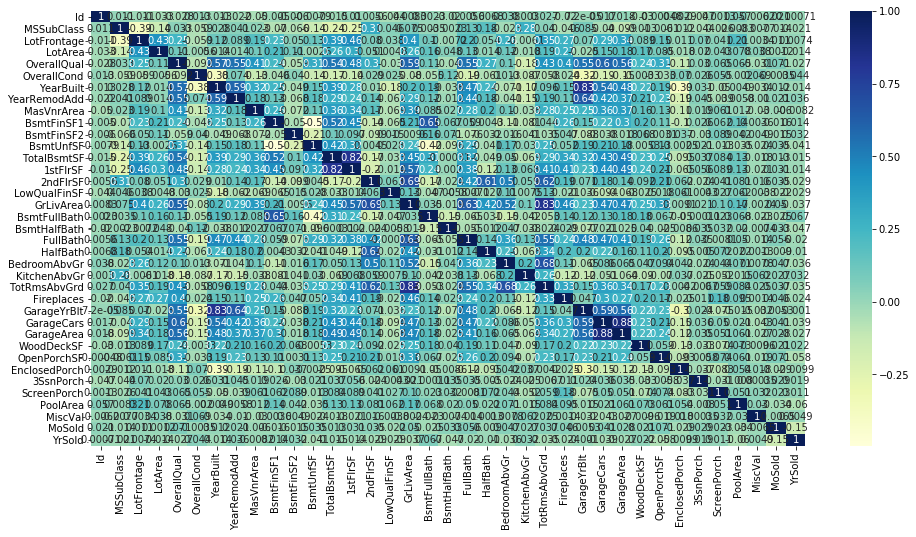

In [883]:
# plotting correlations on a heatmap for all numeric variables
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(housing_data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [884]:
#Data Cleaning
#Inspecting master data frame dimesnions and size
print(housing_data.shape)
print(housing_data.info())

(1113, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1459
Data columns (total 81 columns):
Id               1113 non-null int64
MSSubClass       1113 non-null int64
MSZoning         1113 non-null object
LotFrontage      1113 non-null float64
LotArea          1113 non-null int64
Street           1113 non-null object
Alley            77 non-null object
LotShape         1113 non-null object
LandContour      1113 non-null object
Utilities        1113 non-null object
LotConfig        1113 non-null object
LandSlope        1113 non-null object
Neighborhood     1113 non-null object
Condition1       1113 non-null object
Condition2       1113 non-null object
BldgType         1113 non-null object
HouseStyle       1113 non-null object
OverallQual      1113 non-null int64
OverallCond      1113 non-null int64
YearBuilt        1113 non-null int64
YearRemodAdd     1113 non-null int64
RoofStyle        1113 non-null object
RoofMatl         1113 non-null object
Exterior1st     

In [885]:
#Inspecting column wise total null values
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1036
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       530
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive

In [886]:
#Inspecting column wise percentage of null values
round(100*(((housing_data.isnull()).sum())/len(housing_data.index)),2)

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage        0.00
LotArea            0.00
Street             0.00
Alley             93.08
LotShape           0.00
LandContour        0.00
Utilities          0.00
LotConfig          0.00
LandSlope          0.00
Neighborhood       0.00
Condition1         0.00
Condition2         0.00
BldgType           0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
YearBuilt          0.00
YearRemodAdd       0.00
RoofStyle          0.00
RoofMatl           0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.00
MasVnrArea         0.00
ExterQual          0.00
ExterCond          0.00
Foundation         0.00
                  ...  
BedroomAbvGr       0.00
KitchenAbvGr       0.00
KitchenQual        0.00
TotRmsAbvGrd       0.00
Functional         0.00
Fireplaces         0.00
FireplaceQu       47.62
GarageType         0.00
GarageYrBlt        0.00
GarageFinish       0.00
GarageCars      

In [887]:
#Dropping columns from master data frame with more than 80% null values
housing_data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

In [888]:
#Again Inspecting column wise percentage of null values
round(100*(((housing_data.isnull()).sum())/len(housing_data.index)),2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.16
                 ... 
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces       0.00
GarageType       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageCars       0.00
GarageArea

In [889]:
#Inspecting  number of rows with more than 5 missing values
len(housing_data[housing_data.isnull().sum(axis=1)>5].index)

0

In [890]:
#Inspecting null values percentage of rows
round(100*(len(housing_data[housing_data.isnull().sum(axis=1)>4].index)/len(housing_data.index)),2)

2.16

In [891]:
#Inspecting master data frame after cleaning all null value rows.
round(100*((housing_data.isnull().sum())/len(housing_data.index)),2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.16
                 ... 
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces       0.00
GarageType       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageCars       0.00
GarageArea

In [892]:
#Dropping few more columns with null values greater than 40%
housing_data.drop(['LotFrontage','Id'],axis=1,inplace=True)

In [893]:
# Removing Nulls in certain columns which contain more than 0.5% of null values
housing_data=housing_data[~housing_data['MasVnrType'].isnull()]
housing_data=housing_data[~housing_data['MasVnrArea'].isnull()]
housing_data=housing_data[~housing_data['BsmtExposure'].isnull()]
housing_data=housing_data[~housing_data['BsmtFinType1'].isnull()]
housing_data=housing_data[~housing_data['BsmtFinType2'].isnull()]
housing_data=housing_data[~housing_data['Electrical'].isnull()]
housing_data=housing_data[~housing_data['GarageType'].isnull()]
housing_data=housing_data[~housing_data['GarageYrBlt'].isnull()]
housing_data=housing_data[~housing_data['GarageFinish'].isnull()]
housing_data=housing_data[~housing_data['GarageQual'].isnull()]
housing_data=housing_data[~housing_data['GarageCond'].isnull()]

In [894]:
#Inspecting master data frame after cleaning all null value rows.
round(100*((housing_data.isnull().sum())/len(housing_data.index)),2)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [895]:
#Inspecting total no of available rows without any null values.
housing_data.shape

#Left with 1338 data points to build the model on and 75 features to predict their impact on house price

(1086, 74)

In [896]:
# Inspecting the cleaned master dataframe
print(housing_data.info())
print(housing_data.describe())

#From below result we can see that we have a good number of measurable features and rest all are categorical variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1086 non-null int64
MSZoning         1086 non-null object
LotArea          1086 non-null int64
Street           1086 non-null object
LotShape         1086 non-null object
LandContour      1086 non-null object
Utilities        1086 non-null object
LotConfig        1086 non-null object
LandSlope        1086 non-null object
Neighborhood     1086 non-null object
Condition1       1086 non-null object
Condition2       1086 non-null object
BldgType         1086 non-null object
HouseStyle       1086 non-null object
OverallQual      1086 non-null int64
OverallCond      1086 non-null int64
YearBuilt        1086 non-null int64
YearRemodAdd     1086 non-null int64
RoofStyle        1086 non-null object
RoofMatl         1086 non-null object
Exterior1st      1086 non-null object
Exterior2nd      1086 non-null object
MasVnrType       1086 non-null object
MasVnrArea       1086 non

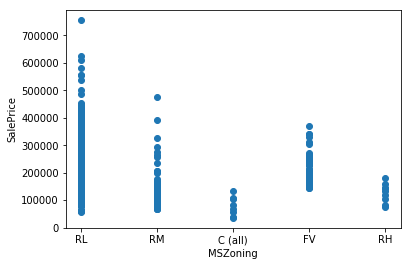

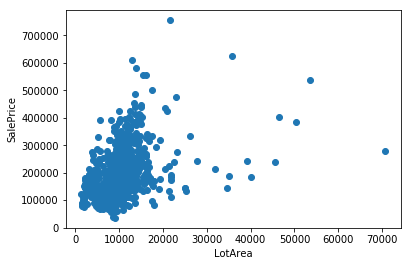

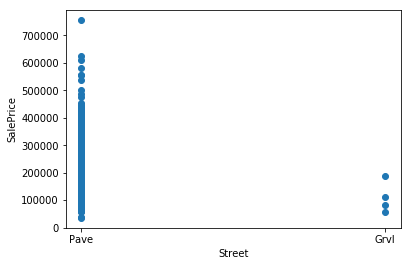

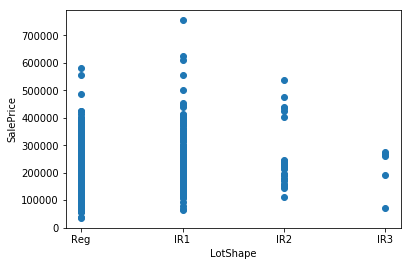

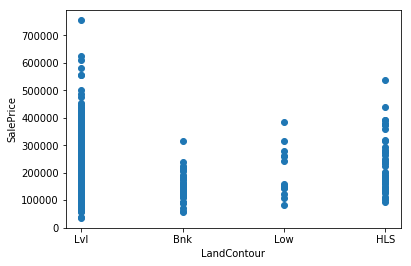

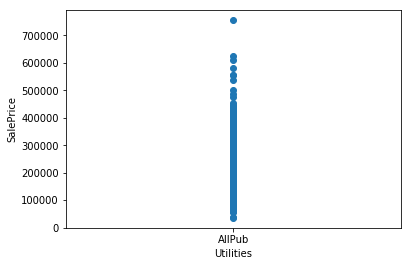

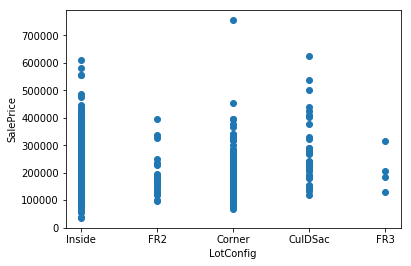

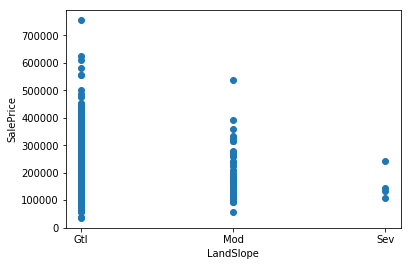

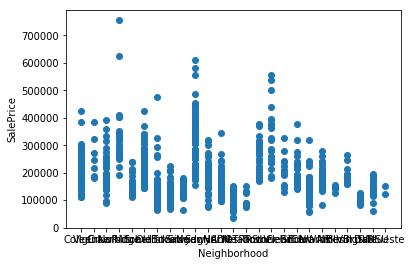

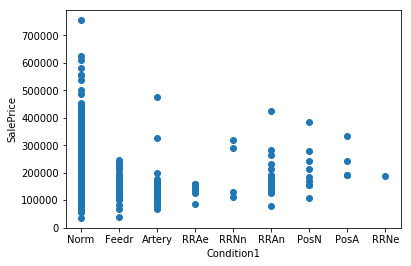

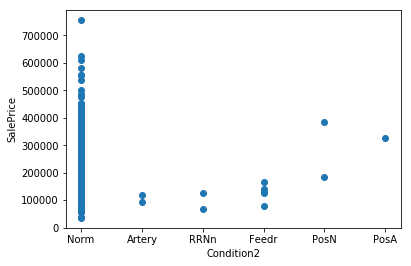

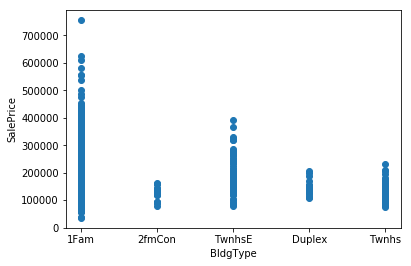

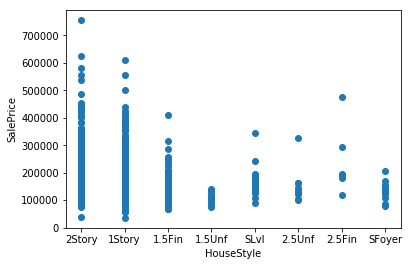

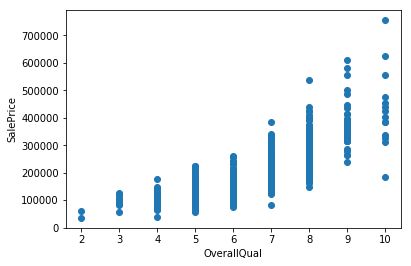

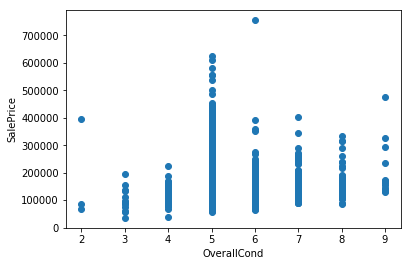

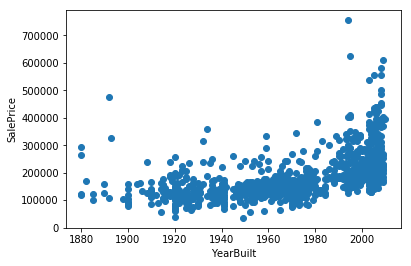

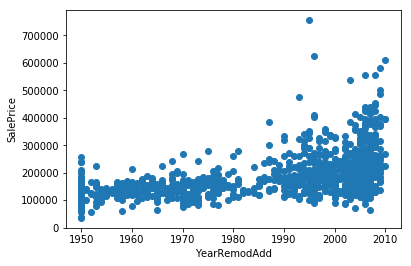

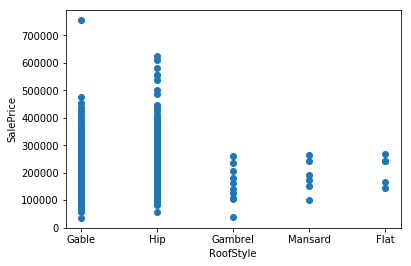

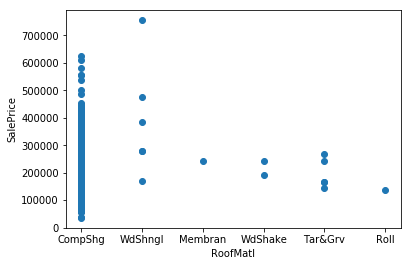

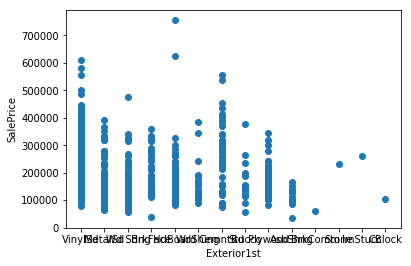

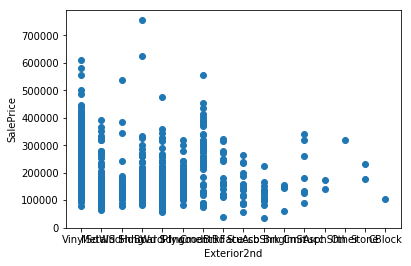

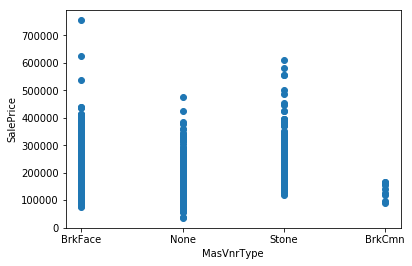

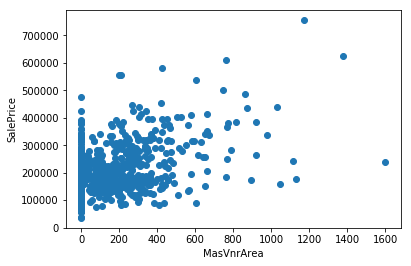

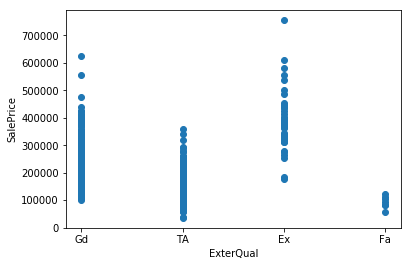

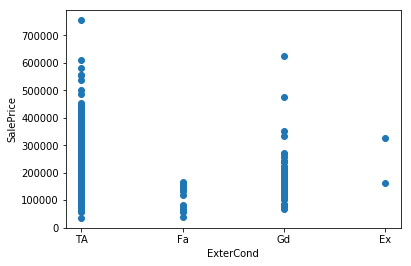

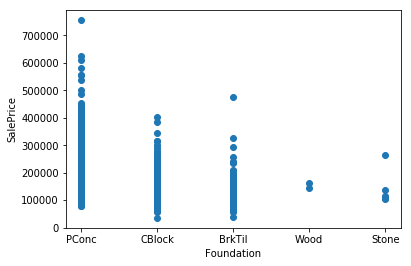

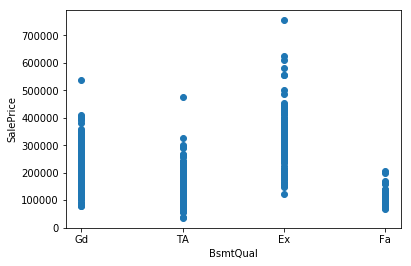

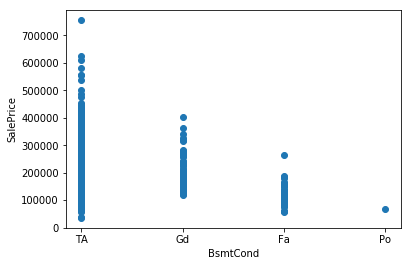

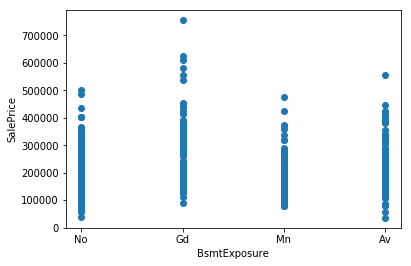

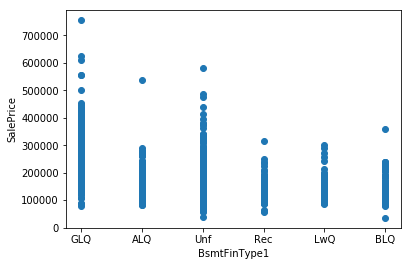

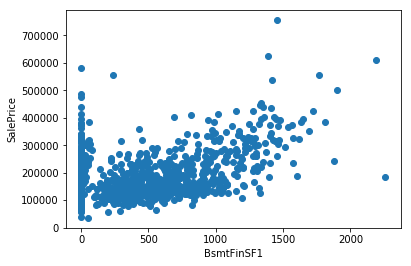

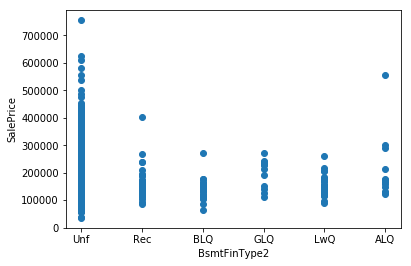

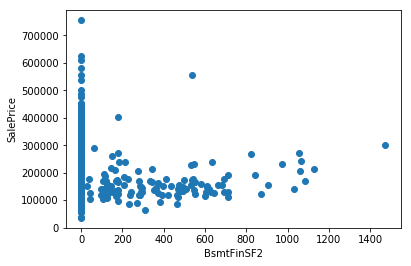

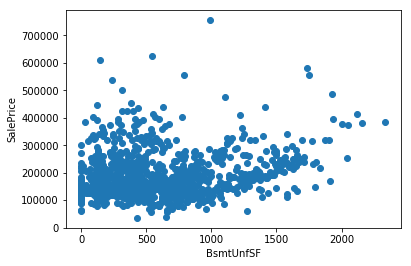

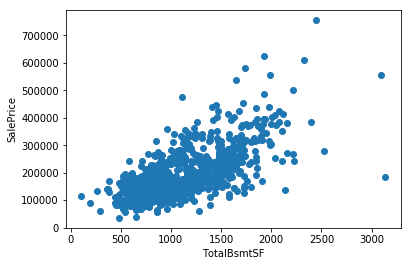

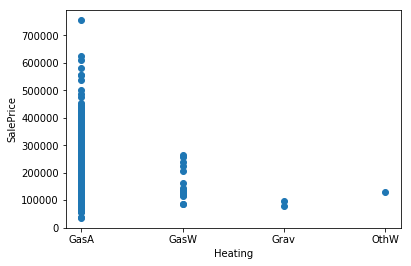

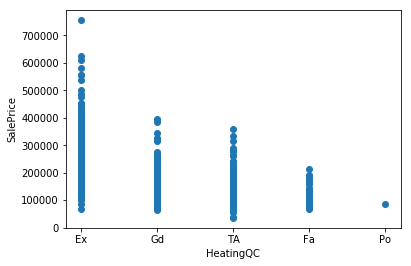

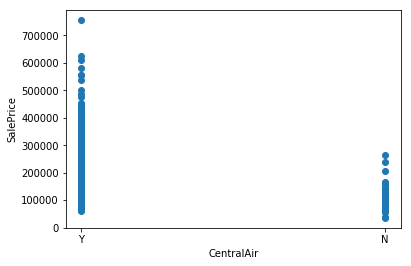

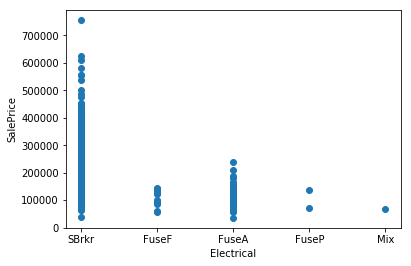

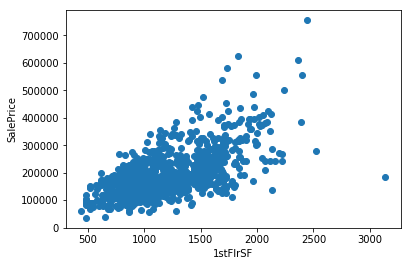

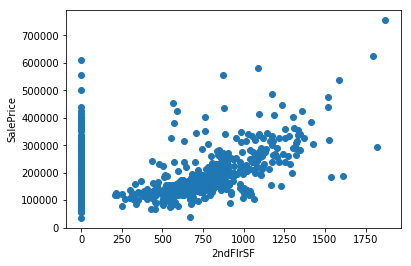

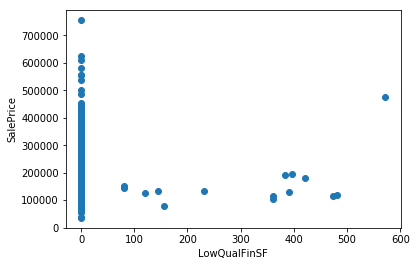

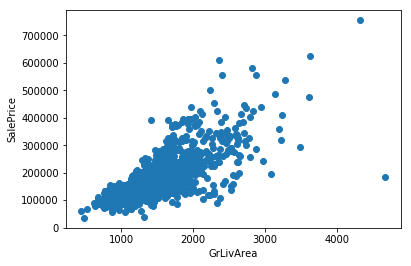

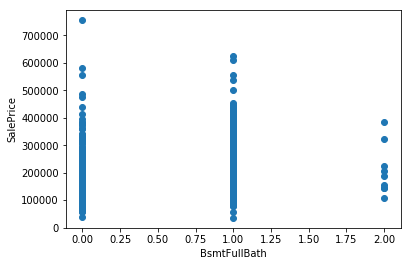

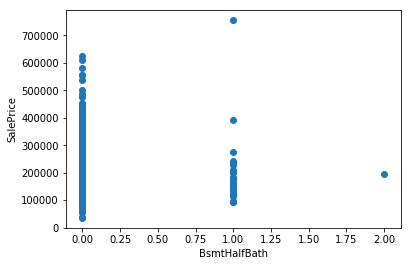

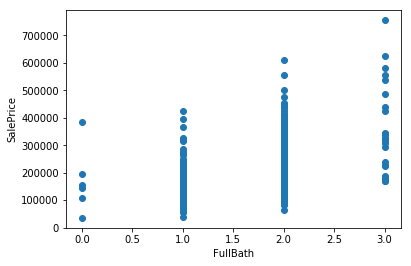

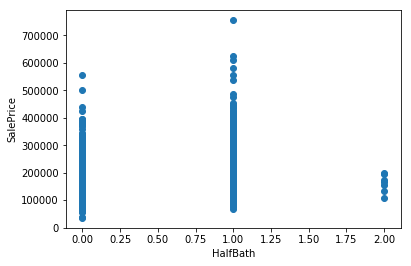

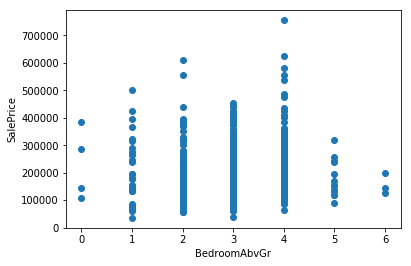

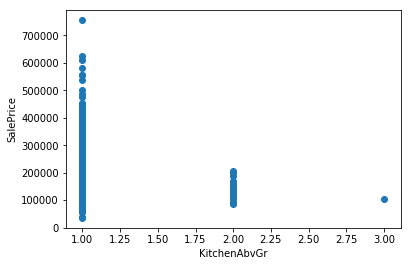

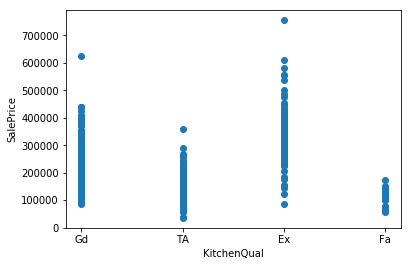

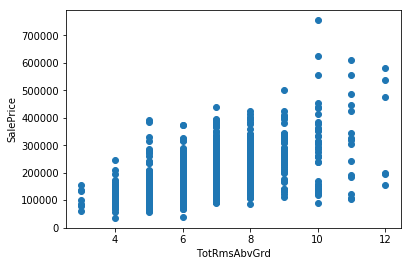

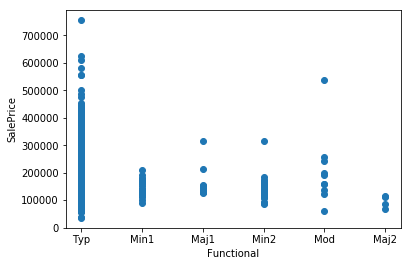

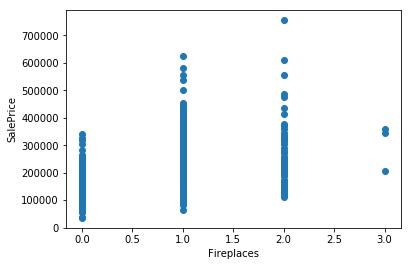

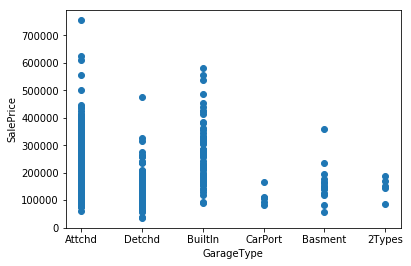

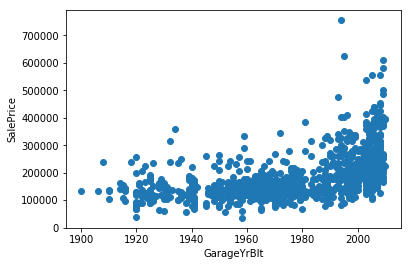

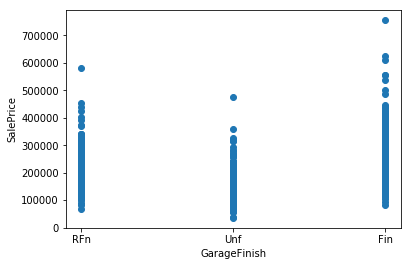

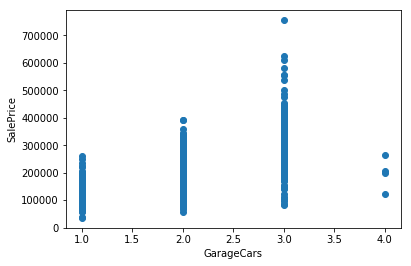

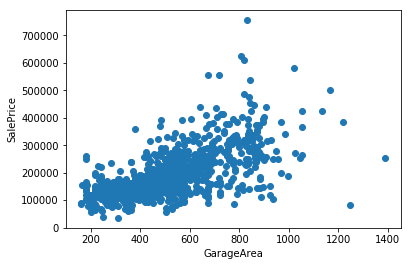

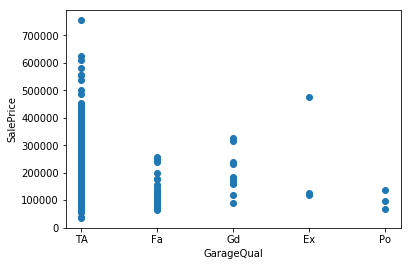

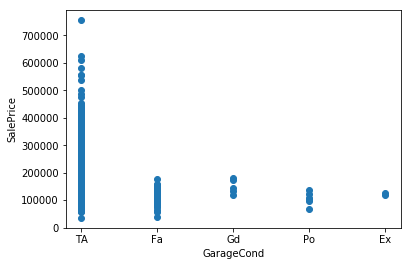

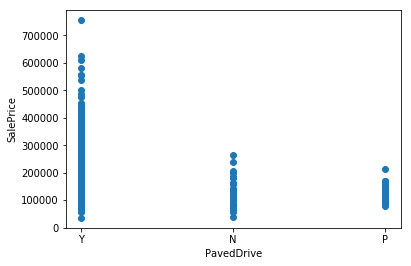

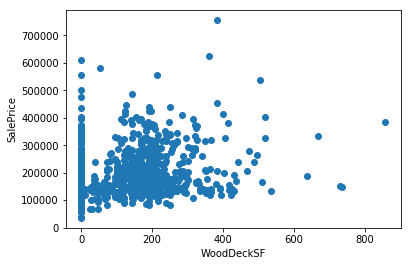

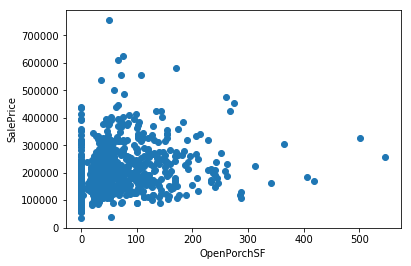

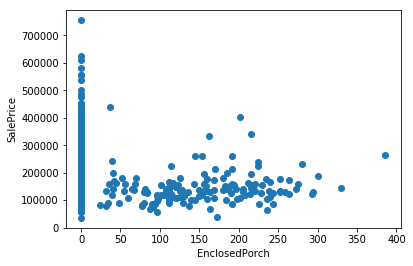

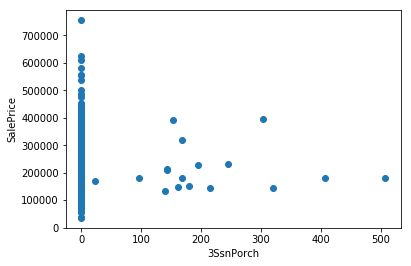

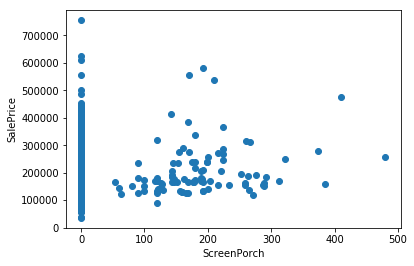

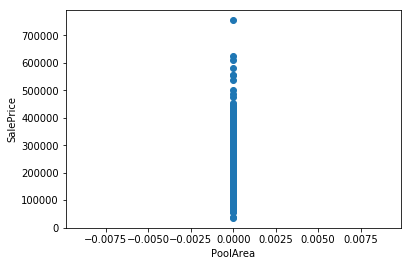

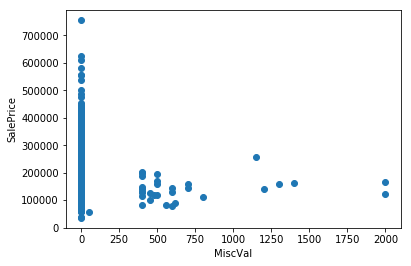

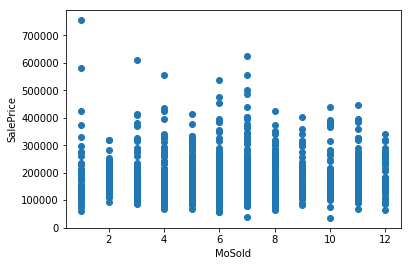

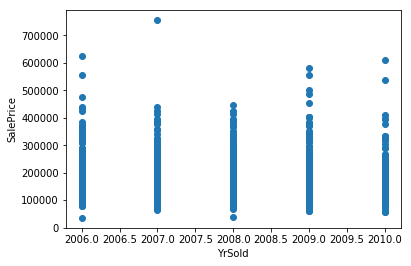

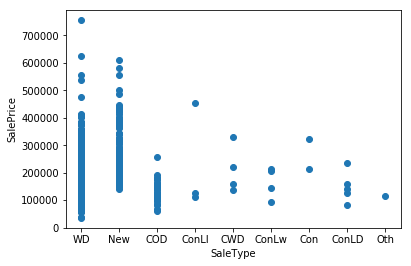

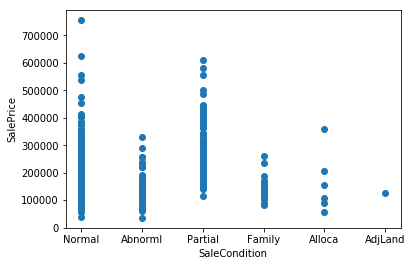

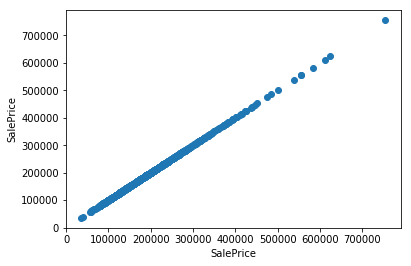

In [897]:
#Plotting house price with all other columns to study the impact of each variable
plt.figure()
for col in range(1, housing_data.shape[1]):
    plt.scatter(housing_data.iloc[:, col],housing_data["SalePrice"])
    plt.xlabel(housing_data.columns[col])
    plt.ylabel("SalePrice")
    plt.show()

In [898]:
# split into X (predictor variables ) and y (output variable)
Y = housing_data.loc[:, 'SalePrice']
X = housing_data.loc[:, housing_data.columns != 'SalePrice']

In [899]:
# creating dummy variables for categorical variables
#subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [900]:
#Mapping all categorical features with [Yes/No] to corresponding numerical output (Yes:1 and No:0)
X['CentralAir']=X['CentralAir'].map({'Y' : 1, 'N' : 0})

In [901]:
# Creating Dummy Variables for categorical variables with more than two levels
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [902]:
# Dropping the repeated columns for which we created dummy variables above.
X = X.drop(list(housing_categorical.columns), axis=1)

In [903]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [904]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=1)

In [905]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Dropping two more irrelevant variables
housing_data_numeric.drop(['Id', 'LotFrontage'],axis=1,inplace=True)

#Scaling train and test data for all numeric features using StandardScaler
X_train[housing_data_numeric.columns] = scaler.fit_transform(X_train[housing_data_numeric.columns])
X_test[housing_data_numeric.columns] = scaler.transform(X_test[housing_data_numeric.columns])

In [906]:
#Implementing ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [907]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007971,0.002274,0.001189,0.000748,0.0001,{'alpha': 0.0001},0.800528,0.907161,0.627045,0.764227,...,0.791463,0.095622,28,0.947362,0.934935,0.963851,0.954427,0.941057,0.948326,0.010113
1,0.006581,0.001620,0.000399,0.000488,0.001,{'alpha': 0.001},0.801065,0.907305,0.627458,0.765369,...,0.792040,0.095551,27,0.947361,0.934935,0.963850,0.954424,0.941056,0.948325,0.010112
2,0.007180,0.002037,0.000996,0.000632,0.01,{'alpha': 0.01},0.805393,0.908593,0.631149,0.773385,...,0.796501,0.094946,25,0.947309,0.934923,0.963812,0.954260,0.940987,0.948258,0.010095
3,0.007181,0.001934,0.000797,0.000399,0.05,{'alpha': 0.05},0.814862,0.912268,0.641463,0.790369,...,0.806860,0.093266,24,0.946848,0.934755,0.963460,0.953231,0.940411,0.947741,0.010004
4,0.007582,0.002569,0.000796,0.000398,0.1,{'alpha': 0.1},0.820559,0.914760,0.647840,0.803508,...,0.813914,0.092372,23,0.946321,0.934445,0.963032,0.952237,0.939759,0.947159,0.009948


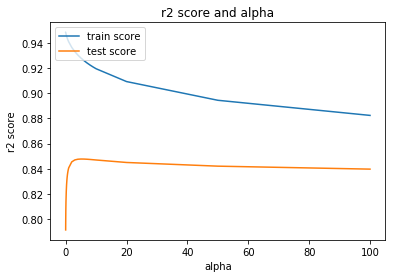

In [908]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')

plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [909]:
#Selecting optimal value of alpha as 6 since as per above plot test r2 score tends to decrease slightly for alpha > 6.
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
ridge.coef_

array([ -5579.60915946,   2382.12874206,  13802.44073226,   6783.9183764 ,
         5366.16291498,   3008.01538809,   2848.90747084,   9018.80499533,
         2400.22874787,   -166.93554852,  10846.77426172,   1004.41452387,
        14112.98460463,    376.24145963,  12892.98889472,   -340.17599713,
         -121.66864531,   -181.35011631,   -612.81196909,  -3018.45571608,
        -2964.29738963,   5841.63856435,   2823.35921308,   -389.7719533 ,
         5367.73727876,   1984.37795725,   1609.46965717,   -784.086873  ,
          432.63778076,   1640.53765063,   1699.18401987,      0.        ,
           75.3019425 ,  -1380.89636075,    -41.05159225,   9751.1429854 ,
         3264.16654084,   3827.39751034,   -323.95474257,  12494.6580223 ,
        11819.75664141,   7377.96139992,   1219.72966882,  16049.14066197,
        -4169.45290409,  11140.97138719,   9874.83213178,  -9206.35855412,
        -2275.04333213,  -3591.99270845,   6024.60015888,  -7177.22916557,
        -1317.06335786,  

In [910]:
# model with optimal alpha
# predicting r2 scores for train and test data suing alpha as 6.
y_train_pred = ridge.predict(X_train)
print("Train R2 Score")
print(metrics.r2_score(y_true=Y_train, y_pred=y_train_pred))
print("Test R2 Score")
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))

Train R2 Score
0.9214310084979984
Test R2 Score
0.8946591534509657


In [911]:
#Implementing Lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   11.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [912]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.110503,0.014402,0.000599,0.000489,0.0001,{'alpha': 0.0001},0.802381,0.904074,0.622918,0.767010,...,0.790978,0.096228,28,0.947358,0.934935,0.963851,0.954422,0.941048,0.948323,0.010114
1,0.100729,0.015046,0.001198,0.000402,0.001,{'alpha': 0.001},0.802387,0.904134,0.622932,0.767015,...,0.790996,0.096238,27,0.947358,0.934935,0.963851,0.954422,0.941048,0.948323,0.010114
2,0.105519,0.017290,0.000798,0.000399,0.01,{'alpha': 0.01},0.802447,0.904729,0.623071,0.767075,...,0.791179,0.096337,26,0.947358,0.934934,0.963851,0.954422,0.941048,0.948322,0.010114
3,0.105518,0.011361,0.000798,0.000399,0.05,{'alpha': 0.05},0.802711,0.906564,0.623681,0.767357,...,0.791830,0.096587,25,0.947357,0.934934,0.963850,0.954421,0.941047,0.948322,0.010114
4,0.087166,0.013103,0.000799,0.000400,0.1,{'alpha': 0.1},0.803035,0.907810,0.624426,0.767699,...,0.792426,0.096659,24,0.947356,0.934934,0.963850,0.954420,0.941045,0.948321,0.010114


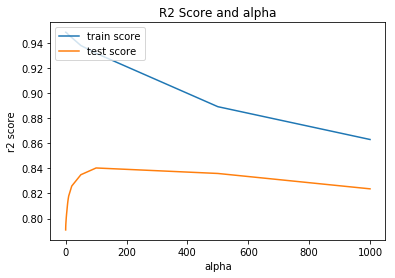

In [913]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')

plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [914]:
#Selecting optimal value of apha as 80 since beyond that test r2 score tends to drop gradually
alpha =80

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=80, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [915]:
# model with optimal alpha
# predicting r2 score for test and train data using alpha as 80
y_train_pred = lasso.predict(X_train)
print("Train R2 Score")
print(metrics.r2_score(y_true=Y_train, y_pred=y_train_pred))
print("Test R2 Score")
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=Y_test, y_pred=y_test_pred))

Train R2 Score
0.9257155417611125
Test R2 Score
0.9021989679633343


In [916]:
#Inspecting lasso coefficient values
lasso.coef_

array([-6.45844277e+03,  2.70296008e+03,  1.35181621e+04,  7.06761803e+03,
        6.55314332e+03,  3.02985102e+03,  2.64501845e+03,  9.29737641e+03,
        1.66640805e+03, -0.00000000e+00,  1.03552859e+04,  0.00000000e+00,
        9.47561576e+03, -1.31468092e+02,  1.67071717e+04, -3.18865249e+02,
       -3.23169285e+02,  0.00000000e+00, -7.59792899e+02, -3.12007915e+03,
       -3.24966404e+03,  4.46947547e+03,  2.11917236e+03,  0.00000000e+00,
        4.44881344e+03,  3.23773921e+03,  1.12068302e+03, -2.52178161e+02,
        3.45329543e+02,  1.29187781e+03,  1.36705560e+03,  0.00000000e+00,
        1.53782424e+02, -1.23978087e+03, -0.00000000e+00,  7.64828473e+03,
        0.00000000e+00,  1.80764470e+03, -0.00000000e+00,  2.08931810e+04,
        1.02393479e+04,  1.51401055e+03,  1.27469221e+03,  1.63525725e+04,
       -2.02226451e+03,  1.09566553e+04,  1.04774668e+04, -7.19903429e+03,
       -0.00000000e+00, -2.38682110e+03,  2.68272389e+03, -2.72505653e+02,
       -0.00000000e+00,  

In [917]:
#Creating a list of all lasso model parameters 
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_features = pd.DataFrame(model_parameters,index=cols)

In [918]:
#Sorting lasso parameters in decreasing order of their coefficient value
lasso_features.columns = ['Coefficient Value']
lasso_features_sorted = lasso_features.sort_values(by='Coefficient Value',ascending=False)
lasso_features_sorted.head()

,Coefficient Value
constant,169856.034
RoofMatl_WdShngl,61910.942
Neighborhood_StoneBr,35728.032
Neighborhood_NoRidge,30232.921
Neighborhood_NridgHt,27884.937


In [919]:
#Exporting excel for a list of optimal features selected
lasso_features_sorted.to_excel("ImportantFeatures.xlsx")

In [920]:
#Poping out list of irrelevant features
lasso_irrelevant_features = lasso_features_sorted.loc[lasso_features_sorted['Coefficient Value'] == 0.0]
lasso_irrelevant_features.head()

,Coefficient Value
BsmtCond_TA,0.0
BsmtCond_Gd,0.0
BsmtCond_Po,0.0
Exterior2nd_Stucco,0.0
Exterior2nd_HdBoard,-0.0


### 1.Important features and their categories which impact the price of House Price are mentioned below.(Descending Order)
RoofMatl_WdShngl
Neighborhood_StoneBr
Neighborhood_NoRidge
Neighborhood_NridgHt
Street_Pave
Neighborhood_Crawfor
LandContour_HLS
GrLivArea
Exterior1st_BrkFace
OverallQual
BsmtExposure_Gd
BldgType_2fmCon
SaleType_New
LandContour_Lvl
LotShape_IR2
LotConfig_CulDSac
TotalBsmtSF
2ndFlrSF
BsmtFinSF1
Functional_Typ
Neighborhood_Somerst
MSZoning_FV
OverallCond
YearBuilt
SaleCondition_Normal
Condition1_Norm
Foundation_PConc
GarageCars
TotRmsAbvGrd
Exterior1st_MetalSd
LotShape_IR3
Foundation_CBlock
BsmtFinType1_GLQ
HouseStyle_SLvl
LandSlope_Mod
Exterior2nd_Wd Sdng
GarageArea
GarageCond_TA
YearRemodAdd
LotArea
MasVnrArea
RoofStyle_Gable
Fireplaces
MSZoning_RL
BsmtFinSF2
Exterior2nd_VinylSd
LotShape_Reg
ScreenPorch
3SsnPorch
Exterior2nd_CmentBd
BsmtFinType1_BLQ
WoodDeckSF
PavedDrive_Y
CentralAir_Y
HouseStyle_SFoyer
RoofStyle_Mansard
Exterior1st_Stucco
EnclosedPorch
Neighborhood_BrDale
HouseStyle_1Story
MasVnrType_None
MiscVal


### On high level we can clearly identify from above list features which affect the house price most in descending order are as below.
1	RoofMatl
2	Neighborhood
3	Street
4	LandContour
5	GrLivArea
6	Exterior1st
7	OverallQual
8	BsmtExposure
9	BldgType
10	SaleType
11	LotShape
12	LotConfig
13	TotalBsmtSF
14	2ndFlrSF
15	BsmtFinSF1
16	Functional
17	MSZoning
18	OverallCond
19	YearBuilt
20	SaleCondition
21	Condition1
22	Foundation
23	GarageCars
24	TotRmsAbvGrd
25	BsmtFinType1
26	HouseStyle
27	LandSlope
28	Exterior2nd
29	GarageArea
30	GarageCond
31	YearRemodAdd
32	LotArea
33	MasVnrArea
34	RoofStyle
35	Fireplaces
36	BsmtFinSF2
37	ScreenPorch
38	3SsnPorch
39	WoodDeckSF
40	PavedDrive
41	CentralAir
42	EnclosedPorch
43	MasVnrType
44	MiscVal

### Higher the value of coefficient associated with feature larger is the impact on house price.Hence above mentioned list is in decreasing order of significance of features.

### For e.g RoofMatl holds the highest rank in impacting House Sale Price followed by Neighborhood,Street and so on.

### 2. Optimal values of Lambda for Lasso and Ridge regularized regression are mentioned below:

#### Lasso Regression : Value of optimal lambda comes out to be 80 as we can clearly see from lasso graph that r2 score for test (0.90) and train  (0.92)  are very close to each other.

#### Ridge Regression : Value of optimal lambda comes out to be 6 as we can clearly see from lasso graph that r2 score for test (0.89) and train  (0.92)  are very close to each other.
